In [14]:
import pandas as pd
from pathlib import Path

csvpath= "Resources/Airbnb_cleaned.csv"

df= pd.read_csv(csvpath)

df = df.drop(columns=['Unnamed: 0'])



In [15]:
!! pip install seaborn

['Requirement already satisfied: seaborn in c:\\users\\shiza\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (0.13.2)',
 'Requirement already satisfied: numpy!=1.24.0,>=1.20 in c:\\users\\shiza\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from seaborn) (2.0.0)',
 'Requirement already satisfied: pandas>=1.2 in c:\\users\\shiza\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from seaborn) (2.2.2)',
 'Requirement already satisfied: matplotlib!=3.6.1,>=3.4 in c:\\users\\shiza\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from seaborn) (3.9.1.post1)',
 'Requirement already satisfied: contourpy>=1.0.1 in c:\\users\\shiza\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.2.1)',
 'Requirement already satisfied: cycler>=0.10 in c:\\users\\shiza\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (0.12.1)',
 'Re

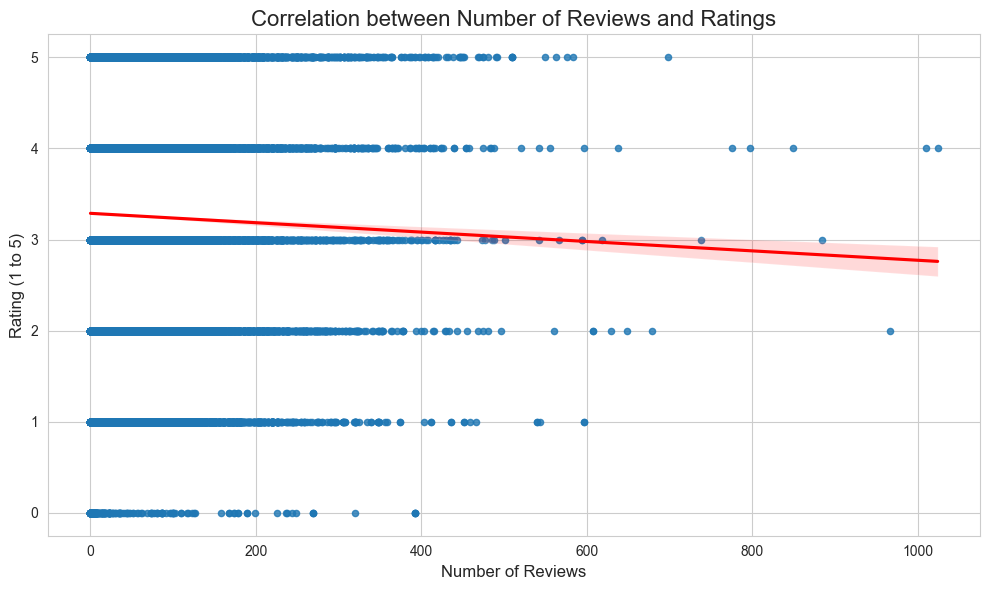

Correlation between number of reviews and ratings: -0.019594977922812055


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded and named airbnb_data

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the scatterplot or regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='number of reviews', y='review rate number', data=df, scatter_kws={'s': 20}, line_kws={'color': 'red'})

# Customize plot
plt.title('Correlation between Number of Reviews and Ratings', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Rating (1 to 5)', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

# Calculate correlation coefficient
correlation_reviews_ratings = df[['number of reviews', 'review rate number']].corr().iloc[0, 1]
print(f"Correlation between number of reviews and ratings: {correlation_reviews_ratings}")



C:\Users\shiza\AppData\Local\Temp\ipykernel_16600\831886835.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Price_Range', 'review rate number'])['calculated host listings count'].sum().unstack(fill_value=0)


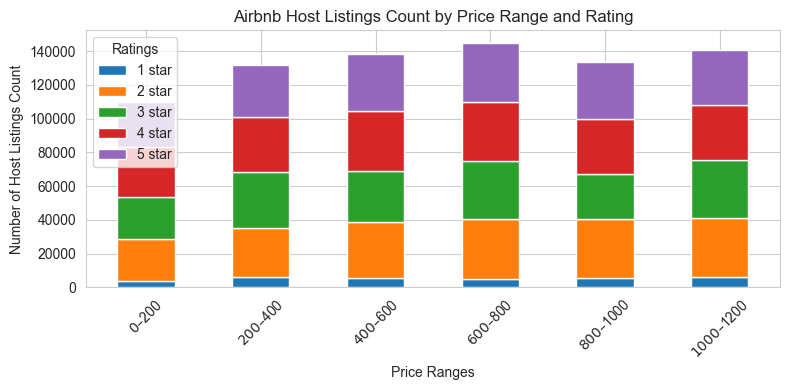

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Remove ratings with value 0 and ensure ratings are between 1 and 5
df = df[df['review rate number'] > 0]  # Remove 0 ratings
df['review rate number'] = df['review rate number'].round(0).clip(upper=5)  # Round and clip the values to ensure they are between 1 and 5

# Define price ranges up to $1200
bins = [0, 200, 400, 600, 800, 1000, 1200]  # Price range bins
labels = ['$0–$200', '$200–$400', '$400–$600', '$600–$800', '$800–$1000', '$1000–$1200']

# Create a new column for price ranges
df['Price_Range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Group by price range and review rate number, then sum the 'calculated host listings count'
grouped = df.groupby(['Price_Range', 'review rate number'])['calculated host listings count'].sum().unstack(fill_value=0)

# Ensure columns for ratings from 1 to 5 exist in the grouped data
grouped = grouped.reindex(columns=[1, 2, 3, 4, 5], fill_value=0)

# Extract price ranges and ratings data
price_ranges = grouped.index
data = grouped.values

# Set up the stacked bar chart
bar_width = 0.5
indices = np.arange(len(price_ranges))

# Stacking the bars
fig, ax = plt.subplots(figsize=(8, 4))

bottom = np.zeros(len(price_ranges))  # To stack bars on top of each other

# Plot each rating level (1 to 5 stars)
for i in range(data.shape[1]):
    ax.bar(indices, data[:, i], bar_width, bottom=bottom, label=f'{i+1} star')
    bottom += data[:, i]  # Update the bottom for the next bar segment

# Customizing the chart
ax.set_xlabel('Price Ranges')
ax.set_ylabel('Number of Host Listings Count')
ax.set_title('Airbnb Host Listings Count by Price Range and Rating')
ax.set_xticks(indices)
ax.set_xticklabels(price_ranges, rotation=45)
ax.legend(title="Ratings")

# Show the plot
plt.tight_layout()
plt.show()
